# <font color='Orange'>Feature Engineering</font>

In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [20]:
data=pd.read_csv("global_heat_index.csv")

In [36]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [21]:
clean1=data[data['Hour']<6]
clean2=data[data['Hour']>18]
clean1.head(10)
clean2.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
43,2011,1,2,19,5,14.152280,987.563416,54.899280,64.419899,2.399542,0
44,2011,1,2,20,4,13.421063,987.949341,55.893813,73.117203,2.673051,0
45,2011,1,2,21,4,12.687589,987.704529,57.250441,81.467941,2.940782,0
46,2011,1,2,22,4,11.969086,987.413086,58.991594,89.379547,3.099676,0
47,2011,1,2,23,4,11.248868,986.698791,61.125686,96.687325,3.158645,0


In [22]:
data=data.drop(clean1.index,axis=0)
data=data.drop(clean2.index,axis=0)


In [23]:
data.shape

(9490, 11)

In [40]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


In [17]:
x=data.iloc[:,0:10]
y=data.iloc[:,-1]


In [51]:
from sklearn.preprocessing import MinMaxScaler
x = pd.DataFrame(MinMaxScaler().fit_transform(x))

In [52]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046


In [53]:
corr_matrix=data.corr()

In [54]:
corr_matrix

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,-1.206385e-12,-7.246516e-14,-1.405069e-15,-0.139773,0.026887,0.020252,-0.166373,0.011996,0.037455,-0.013891
Month,-1.206385e-12,1.000000e+00,1.189318e-02,2.245486e-15,0.491577,-0.038576,-0.036657,0.460993,-0.102648,-0.216902,-0.090227
Day,-7.246516e-14,1.189318e-02,1.000000e+00,2.402170e-17,-0.017772,-0.011873,0.046708,-0.005074,-0.021712,0.038542,0.011420
Hour,-1.405069e-15,2.245486e-15,2.402170e-17,1.000000e+00,-0.020686,0.269499,-0.183460,-0.211869,0.113641,0.006593,0.040573
Dew Point,-1.397731e-01,4.915774e-01,-1.777210e-02,-2.068626e-02,1.000000,0.198330,-0.587488,0.790023,0.160133,0.072254,-0.024650
Temperature,2.688710e-02,-3.857553e-02,-1.187262e-02,2.694991e-01,0.198330,1.000000,-0.627170,-0.344609,0.431627,0.263510,0.608713
Pressure,2.025241e-02,-3.665724e-02,4.670753e-02,-1.834597e-01,-0.587488,-0.627170,1.000000,-0.244693,-0.428785,-0.435057,-0.144057
Relative Humidity,-1.663735e-01,4.609927e-01,-5.073932e-03,-2.118687e-01,0.790023,-0.344609,-0.244693,1.000000,-0.053618,-0.107921,-0.371410
Wind Direction,1.199631e-02,-1.026477e-01,-2.171216e-02,1.136411e-01,0.160133,0.431627,-0.428785,-0.053618,1.000000,0.207285,0.168475
Wind Speed,3.745498e-02,-2.169017e-01,3.854214e-02,6.593433e-03,0.072254,0.263510,-0.435057,-0.107921,0.207285,1.000000,0.007935


<Axes: >

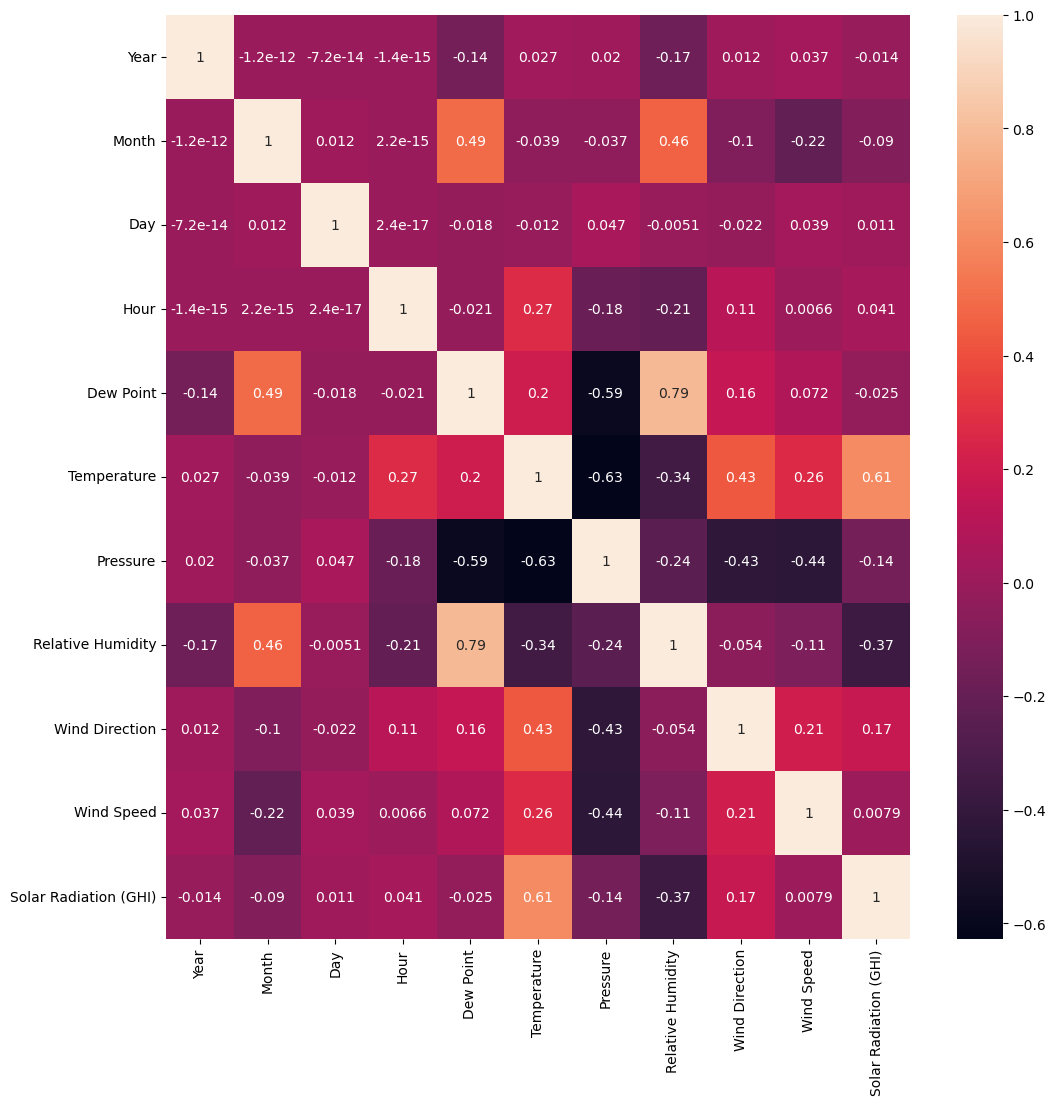

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

# <font color="Orange">ExtraTreeClassifier</font>

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)


ExtraTreesClassifier()

In [57]:
col = ['Year','Month','Day','Hour','Dew Point','Temperature','Pressure','Relative Humidity','Wind Direction','Wind']
feature_imp=pd.Series(model.feature_importances_,index=col)
feature_imp

Year                 0.026888
Month                0.043087
Day                  0.110018
Hour                 0.110280
Dew Point            0.088816
Temperature          0.139561
Pressure             0.124516
Relative Humidity    0.122663
Wind Direction       0.116692
Wind                 0.117479
dtype: float64

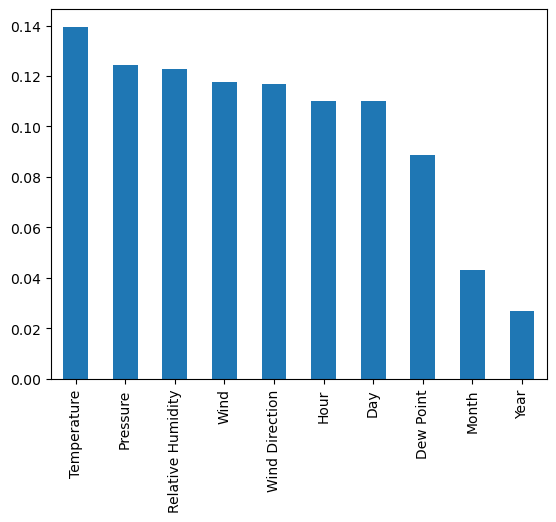

In [58]:
feature_imp.nlargest(10).plot(kind='bar')
plt.show()

# Select Kbest

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
bestfeatures=SelectKBest(score_func=chi2,k=10).fit(x,y)


In [71]:
scores=pd.DataFrame(bestfeatures.scores_)
columns=pd.DataFrame(col)


In [72]:
features_scores=pd.concat([columns,scores],axis=1)
features_scores.columns=['Features','Score']

In [73]:
features_scores

,Features,Score
0,Year,504.976721
1,Month,236.303859
2,Day,208.497847
3,Hour,271.978728
4,Dew Point,74.952667
5,Temperature,306.062548
6,Pressure,213.040872
7,Relative Humidity,397.828591
8,Wind Direction,221.823327
9,Wind,148.735716


# PCA Implementation

## Cleaning the data

In [25]:
x = data.iloc[:,4:10].values
y = data.iloc[:,10].values
y = y.reshape(-1,1)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.fit_transform(x_test)
y_train=sc_X.fit_transform(y_train)

In [27]:
x_train

array([[ 1.05968611, -0.10596836, -0.86953246,  1.20221031,  0.39135863,
         0.85990992],
       [-0.37392147,  0.19583916,  0.47710333, -0.76144896, -1.50792046,
        -0.50344039],
       [-0.55312242,  1.93732438, -0.45296102, -1.2558607 ,  0.65110389,
        -0.08327831],
       ...,
       [-0.91152432, -1.53411535,  1.4209813 , -0.25832627, -1.86235409,
        -0.79438603],
       [ 1.14928659, -0.49504108, -0.63737524,  2.10272218,  0.19963805,
         0.43482279],
       [ 1.23888706, -0.16074724, -0.86803804,  1.65343846,  0.47756634,
         0.12011598]])

In [52]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6,random_state=0)
kmeans=kmeans.fit(x_train)

/Users/siddharthnagaych/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
labels=kmeans.labels_
print("labels",labels)
cluster_centers = kmeans.cluster_centers_
print("\n\n Cluster Centroids : \n",cluster_centers)

labels [4 2 3 ... 5 4 4]


 Cluster Centroids : 
 [[ 0.16514599 -0.37183722  0.64944113  0.20694672  0.67454948 -0.79919315]
 [ 0.4028263   1.05270045 -1.07625442 -0.40782607  0.51052584  1.49341357]
 [-0.62922428 -0.2382606   0.85747373 -0.5826973  -1.35137904 -0.68896787]
 [-1.06742046  0.68333301  0.04957812 -1.16310858  0.83404147  0.01356953]
 [ 1.18774524  0.07107491 -0.93458801  1.27392977  0.25329346 -0.09429523]
 [-0.63825654 -1.64715456  1.1805509   0.27677496 -1.09069466 -0.03323327]]


In [69]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(x_train).transform(x_train)

In [70]:
pca

array([[-1.59837425, -1.04649685],
       [ 1.2422458 ,  0.2751212 ],
       [-0.79398024,  2.07624203],
       ...,
       [ 2.88500539, -0.70662158],
       [-1.31961631, -2.03068811],
       [-1.55187659, -1.6325982 ]])

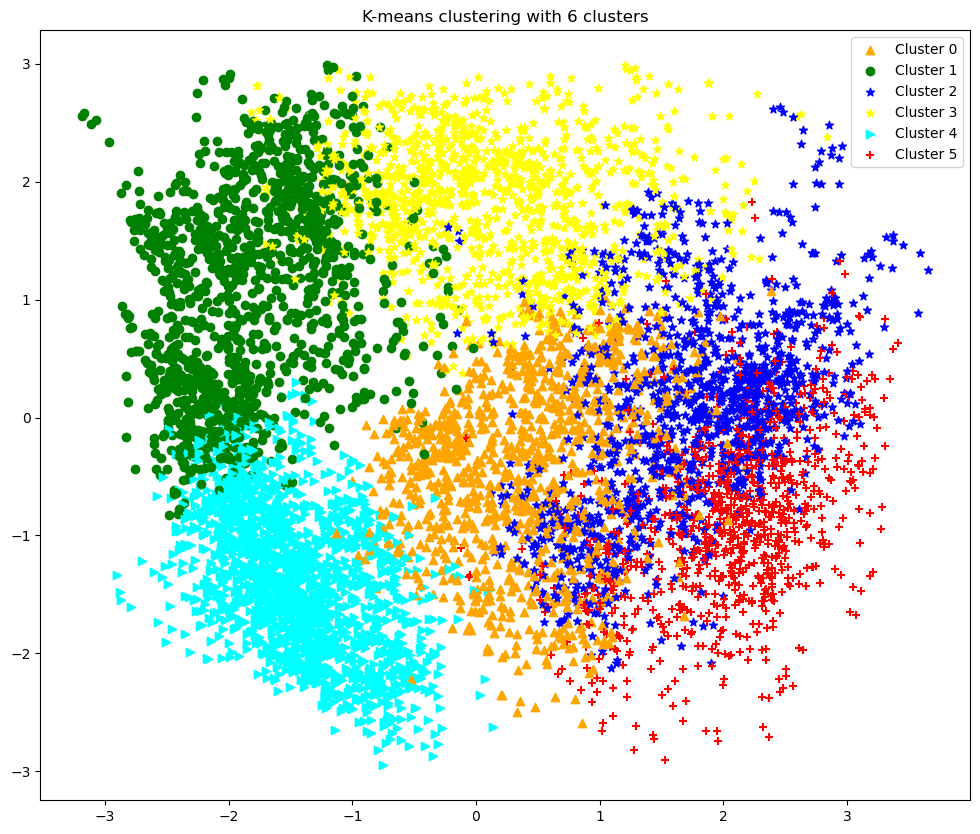

In [83]:
for i in range(0,pca.shape[0]):
    if   kmeans.labels_[i] == 0:
        c1_6 = plt.scatter(pca[i, 0],pca[i, 1],c = "orange", marker = "^")
    elif kmeans.labels_[i] == 1:
        c2_6 = plt.scatter(pca[i,0],pca[i,1],c='green', marker='o')
    elif kmeans.labels_[i] == 2:
        c3_6 = plt.scatter(pca[i,0],pca[i,1],c='blue', marker='*')
    elif kmeans.labels_[i] == 3:
        c4_6 = plt.scatter(pca[i,0],pca[i,1],c='yellow',marker="*")
    elif kmeans.labels_[i] == 4:
        c5_6 = plt.scatter (pca[i,0],pca[i,1],c='cyan', marker='>')
    elif kmeans.labels_[i] == 5:
        c6_6 = plt.scatter (pca[i,0],pca[i,1],c='red', marker='+')
plt.rcParams["figure.figsize"] = (12, 10)
plt.legend([c1_6,c2_6,c3_6,c4_6,c5_6,c6_6],['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
plt.title('K-means clustering with 6 clusters')
plt.show()